# Mini Project NYPD Shootings

## Andrew Rorex and Joseph Fernandez

In [1]:
pip install jupyter-ai~=1.0

  Using cached aiosqlite-0.20.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached jupyterlab-3.6.8-py3-none-any.whl.metadata (12 kB)
  Using cached packaging-24.1-py3-none-any.whl.metadata (3.2 kB)
  Using cached jupyter_ydoc-0.2.5-py3-none-any.whl.metadata (2.2 kB)
  Using cached jupyter_server_ydoc-0.8.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached nbclassic-1.1.0-py3-none-any.whl.metadata (3.6 kB)
  Using cached notebook-6.5.7-py3-none-any.whl.metadata (2.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached jupyter_server_fileid-0.9.3-py3-none-any.whl.metadata (4.7 kB)
  Using cached ypy_websocket-0.8.4-py3-none-any.whl.metadata (2.5 kB)
  Using cached y_py-0.6.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 8

In [2]:
pip install jupyter-ai[all]

INFO: pip is looking at multiple versions of langchain-anthropic to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-aws to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-cohere to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-google-genai to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-mistralai to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-nvidia-ai-endpoints to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-ollam

In [3]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

In [5]:
import os
os.environ["OPENAI_API_KEY"] = get_secret('openai')['api_key']

In [6]:
%load_ext jupyter_ai_magics

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [23]:
import pandas as pd

df = pd.read_csv("s3://ia340-2024-fall-01-5222018/NYPD_Shooting_Incident_Data__Historic_.csv")

df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,244608249,05/05/2022,00:10:00,MANHATTAN,INSIDE,14,0.0,COMMERCIAL,VIDEO STORE,True,...,M,BLACK,25-44,M,BLACK,986050.000,214231.000000,40.754692,-73.993500,POINT (-73.9935 40.754692)
1,247542571,07/04/2022,22:20:00,BRONX,OUTSIDE,48,0.0,STREET,(null),True,...,(null),(null),18-24,M,BLACK,1016802.000,250581.000000,40.854402,-73.882330,POINT (-73.88233 40.854402)
2,84967535,05/27/2012,19:35:00,QUEENS,NaN,103,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1048632.000,198262.000000,40.710634,-73.767773,POINT (-73.76777349199995 40.71063412500007)
3,202853370,09/24/2019,21:00:00,BRONX,NaN,42,0.0,NaN,NaN,False,...,M,UNKNOWN,25-44,M,BLACK,1014493.000,242565.000000,40.832417,-73.890714,POINT (-73.89071440599997 40.832416753000075)
4,27078636,02/25/2007,21:00:00,BROOKLYN,NaN,83,0.0,NaN,NaN,False,...,M,BLACK,25-44,M,BLACK,1009149.375,190104.703125,40.688443,-73.910219,POINT (-73.91021857399994 40.68844345900004)


In [24]:
df.describe()

,INCIDENT_KEY,PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,2.856200e+04,28562.000000,28560.000000,2.856200e+04,28562.000000,28503.000000,28503.000000
mean,1.274058e+08,65.496009,0.321884,1.009424e+06,208380.075755,40.738570,-73.909099
std,7.804340e+07,27.342643,0.733035,1.830111e+04,31917.509528,0.087611,0.065967
min,9.953245e+06,1.000000,0.000000,9.149281e+05,125756.718750,40.511586,-74.249303
25%,6.543991e+07,44.000000,0.000000,1.000068e+06,182912.000000,40.668648,-73.942917
50%,9.271125e+07,67.000000,0.000000,1.007772e+06,194901.390625,40.701467,-73.915068
75%,2.031320e+08,81.000000,0.000000,1.016807e+06,239814.234375,40.824878,-73.882366
max,2.797581e+08,123.000000,2.000000,1.066815e+06,271127.687500,40.910818,-73.702046


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28562 entries, 0 to 28561
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             28562 non-null  int64  
 1   OCCUR_DATE               28562 non-null  object 
 2   OCCUR_TIME               28562 non-null  object 
 3   BORO                     28562 non-null  object 
 4   LOC_OF_OCCUR_DESC        2966 non-null   object 
 5   PRECINCT                 28562 non-null  int64  
 6   JURISDICTION_CODE        28560 non-null  float64
 7   LOC_CLASSFCTN_DESC       2966 non-null   object 
 8   LOCATION_DESC            13585 non-null  object 
 9   STATISTICAL_MURDER_FLAG  28562 non-null  bool   
 10  PERP_AGE_GROUP           19218 non-null  object 
 11  PERP_SEX                 19252 non-null  object 
 12  PERP_RACE                19252 non-null  object 
 13  VIC_AGE_GROUP            28562 non-null  object 
 14  VIC_SEX               

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28562 entries, 0 to 28561
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             28562 non-null  int64  
 1   OCCUR_DATE               28562 non-null  object 
 2   OCCUR_TIME               28562 non-null  object 
 3   BORO                     28562 non-null  object 
 4   LOC_OF_OCCUR_DESC        2966 non-null   object 
 5   PRECINCT                 28562 non-null  int64  
 6   JURISDICTION_CODE        28560 non-null  float64
 7   LOC_CLASSFCTN_DESC       2966 non-null   object 
 8   LOCATION_DESC            13585 non-null  object 
 9   STATISTICAL_MURDER_FLAG  28562 non-null  bool   
 10  PERP_AGE_GROUP           19218 non-null  object 
 11  PERP_SEX                 19252 non-null  object 
 12  PERP_RACE                19252 non-null  object 
 13  VIC_AGE_GROUP            28562 non-null  object 
 14  VIC_SEX               

In [33]:
%%ai gpt4
What is in the {df} in {In[11]}

The `df.info()` function in pandas provides a concise summary of the DataFrame including the number of non-null entries in each column, the column data types, and the memory usage. Here's a potential output for your DataFrame:

```markdown
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28562 entries, 0 to 28561
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   INCIDENT_KEY             28562 non-null  int64         
 1   OCCUR_DATE               28562 non-null  datetime64[ns]
 2   OCCUR_TIME               28562 non-null  object        
 3   BORO                     28562 non-null  object        
 4   LOC_OF_OCCUR_DESC        26345 non-null  object        
 5   PRECINCT                 28562 non-null  int64         
 6   JURISDICTION_CODE        28562 non-null  float64       
 7   LOC_CLASSFCTN_DESC       26345 non-null  object        
 8   LOCATION_DESC            26345 non-null  object        
 9   STATISTICAL_MURDER_FLAG  28562 non-null  bool          
 10  PERP_AGE_GROUP           26345 non-null  object        
 11  PERP_SEX                 26345 non-null  object        
 12  PERP_RACE                26345 non-null  object        
 13  VIC_AGE_GROUP            28562 non-null  object        
 14  VIC_SEX                  28562 non-null  object        
 15  VIC_RACE                 28562 non-null  object        
 16  X_COORD_CD               28562 non-null  float64       
 17  Y_COORD_CD               28562 non-null  float64       
 18  Latitude                 28562 non-null  float64       
 19  Longitude                28562 non-null  float64       
 20  Lon_Lat                  28562 non-null  object        
 21  year                     28562 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(5), int64(3), object(12)
memory usage: 4.6+ MB
```

This output indicates that there are 28562 entries in the DataFrame. Some columns like 'LOC_OF_OCCUR_DESC', 'LOC_CLASSFCTN_DESC', 'LOCATION_DESC', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE' have missing values as the non-null count is less than the total number of entries. The data types of the columns vary, with integers (int64), floats (float64), objects (object), datetime (datetime64[ns]), and boolean (bool) data types present. The DataFrame is using approximately 4.6+ MB of memory.

In [28]:
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,244608249,05/05/2022,00:10:00,MANHATTAN,INSIDE,14,0.0,COMMERCIAL,VIDEO STORE,True,...,M,BLACK,25-44,M,BLACK,986050.000,214231.000000,40.754692,-73.993500,POINT (-73.9935 40.754692)
1,247542571,07/04/2022,22:20:00,BRONX,OUTSIDE,48,0.0,STREET,(null),True,...,(null),(null),18-24,M,BLACK,1016802.000,250581.000000,40.854402,-73.882330,POINT (-73.88233 40.854402)
2,84967535,05/27/2012,19:35:00,QUEENS,NaN,103,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1048632.000,198262.000000,40.710634,-73.767773,POINT (-73.76777349199995 40.71063412500007)
3,202853370,09/24/2019,21:00:00,BRONX,NaN,42,0.0,NaN,NaN,False,...,M,UNKNOWN,25-44,M,BLACK,1014493.000,242565.000000,40.832417,-73.890714,POINT (-73.89071440599997 40.832416753000075)
4,27078636,02/25/2007,21:00:00,BROOKLYN,NaN,83,0.0,NaN,NaN,False,...,M,BLACK,25-44,M,BLACK,1009149.375,190104.703125,40.688443,-73.910219,POINT (-73.91021857399994 40.68844345900004)


In [16]:
%%ai gpt4
Write python code to turn the OCCUR_DATE column in the {df} to a datetime variable

You can convert the `OCCUR_DATE` column to a datetime object in Python using the `pd.to_datetime()` function from pandas. Here is a sample code:

```python
import pandas as pd

# Assuming df is your DataFrame
df['OCCUR_DATE'] = pd.to_datetime(df['OCCUR_DATE'])
```

This will convert the `OCCUR_DATE` column in the DataFrame to a datetime object. If the `OCCUR_DATE` is not in the default format (YYYY-MM-DD), you may need to provide the `format` parameter to specify the current format of date.

```python
df['OCCUR_DATE'] = pd.to_datetime(df['OCCUR_DATE'], format='%m/%d/%Y')
```

In this case, the format '%m/%d/%Y' is used because the date appears to be in the form 'MM/DD/YYYY'. You should adjust the `format` parameter according to the actual format of your dates.

In [29]:
df['OCCUR_DATE'] = pd.to_datetime(df['OCCUR_DATE'], format='%m/%d/%Y')

In [30]:
df.describe()

,INCIDENT_KEY,OCCUR_DATE,PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,2.856200e+04,28562,28562.000000,28560.000000,2.856200e+04,28562.000000,28503.000000,28503.000000
mean,1.274058e+08,2014-06-07 07:03:45.110286336,65.496009,0.321884,1.009424e+06,208380.075755,40.738570,-73.909099
min,9.953245e+06,2006-01-01 00:00:00,1.000000,0.000000,9.149281e+05,125756.718750,40.511586,-74.249303
25%,6.543991e+07,2009-09-04 06:00:00,44.000000,0.000000,1.000068e+06,182912.000000,40.668648,-73.942917
50%,9.271125e+07,2013-09-20 00:00:00,67.000000,0.000000,1.007772e+06,194901.390625,40.701467,-73.915068
75%,2.031320e+08,2019-09-29 18:00:00,81.000000,0.000000,1.016807e+06,239814.234375,40.824878,-73.882366
max,2.797581e+08,2023-12-29 00:00:00,123.000000,2.000000,1.066815e+06,271127.687500,40.910818,-73.702046
std,7.804340e+07,NaN,27.342643,0.733035,1.830111e+04,31917.509528,0.087611,0.065967


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28562 entries, 0 to 28561
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   INCIDENT_KEY             28562 non-null  int64         
 1   OCCUR_DATE               28562 non-null  datetime64[ns]
 2   OCCUR_TIME               28562 non-null  object        
 3   BORO                     28562 non-null  object        
 4   LOC_OF_OCCUR_DESC        2966 non-null   object        
 5   PRECINCT                 28562 non-null  int64         
 6   JURISDICTION_CODE        28560 non-null  float64       
 7   LOC_CLASSFCTN_DESC       2966 non-null   object        
 8   LOCATION_DESC            13585 non-null  object        
 9   STATISTICAL_MURDER_FLAG  28562 non-null  bool          
 10  PERP_AGE_GROUP           19218 non-null  object        
 11  PERP_SEX                 19252 non-null  object        
 12  PERP_RACE                19252 n

In [20]:
%%ai gpt4
Write python code to create a visualization of number of crimes per year in the {df}

To create a visualization of the number of crimes per year, you can use the pandas `groupby()` function to group the data by year, and then use the matplotlib library to create a bar plot. Here is a sample code:

```python
import matplotlib.pyplot as plt

# Create a new column 'year' by extracting the year from 'OCCUR_DATE'
df['year'] = df['OCCUR_DATE'].dt.year

# Group by 'year' and count the number of crimes
crime_count_per_year = df.groupby('year').size()

# Create a bar plot
crime_count_per_year.plot(kind='bar', figsize=(10,6))

plt.title('Number of Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

plt.show()
```

In this code, `df['OCCUR_DATE'].dt.year` is used to extract the year from the `OCCUR_DATE` column. `df.groupby('year').size()` is used to count the number of crimes for each year. The `plot()` function from matplotlib is then used to create a bar plot of the number of crimes per year.

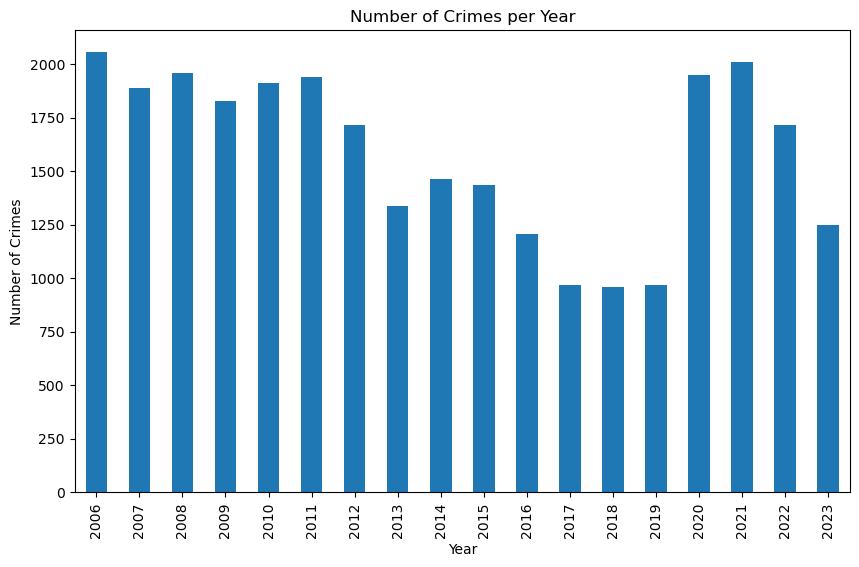

In [32]:
import matplotlib.pyplot as plt

# Create a new column 'year' by extracting the year from 'OCCUR_DATE'
df['year'] = df['OCCUR_DATE'].dt.year

# Group by 'year' and count the number of crimes
crime_count_per_year = df.groupby('year').size()

# Create a bar plot
crime_count_per_year.plot(kind='bar', figsize=(10,6))

plt.title('Number of Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

plt.show()

In [34]:
%%ai gpt4
Write python code to create a visualization of number of victims per race in the {df}

To create a visualization of the number of victims per race, you can use the pandas `value_counts()` function to count the number of victims for each race, and then use the matplotlib library to create a bar plot. Here is a sample code:

```python
import matplotlib.pyplot as plt

# Count the number of victims for each race
victim_count_per_race = df['VIC_RACE'].value_counts()

# Create a bar plot
victim_count_per_race.plot(kind='bar', figsize=(10,6))

plt.title('Number of Victims per Race')
plt.xlabel('Race')
plt.ylabel('Number of Victims')

plt.show()
```

In this code, `df['VIC_RACE'].value_counts()` is used to count the number of victims for each race. The `plot()` function from matplotlib is then used to create a bar plot of the number of victims per race.

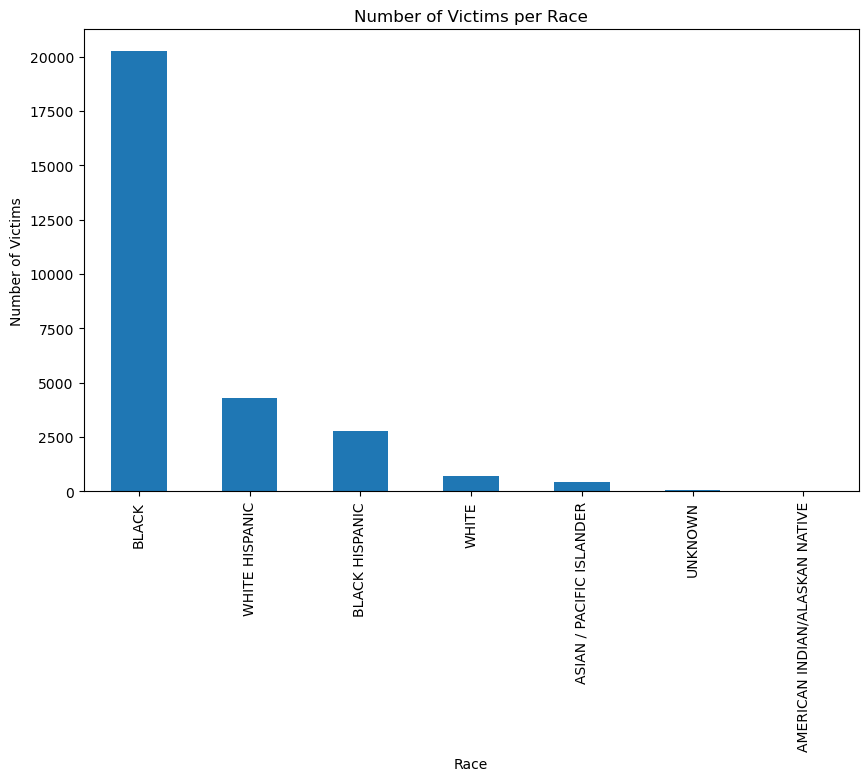

In [35]:
import matplotlib.pyplot as plt

# Count the number of victims for each race
victim_count_per_race = df['VIC_RACE'].value_counts()

# Create a bar plot
victim_count_per_race.plot(kind='bar', figsize=(10,6))

plt.title('Number of Victims per Race')
plt.xlabel('Race')
plt.ylabel('Number of Victims')

plt.show()

In [36]:
%%ai gpt4
Write python code to create a visualization of number of victims per age group in the {df}

To create a visualization of the number of victims per age group, you can again use the pandas `value_counts()` function to count the number of victims for each age group, and then use the matplotlib library to create a bar plot. Here is a sample code:

```python
import matplotlib.pyplot as plt

# Count the number of victims for each age group
victim_count_per_age_group = df['VIC_AGE_GROUP'].value_counts()

# Create a bar plot
victim_count_per_age_group.plot(kind='bar', figsize=(10,6))

plt.title('Number of Victims per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Victims')

plt.show()
```

In this code, `df['VIC_AGE_GROUP'].value_counts()` is used to count the number of victims for each age group. The `plot()` function from matplotlib is then used to create a bar plot of the number of victims per age group.

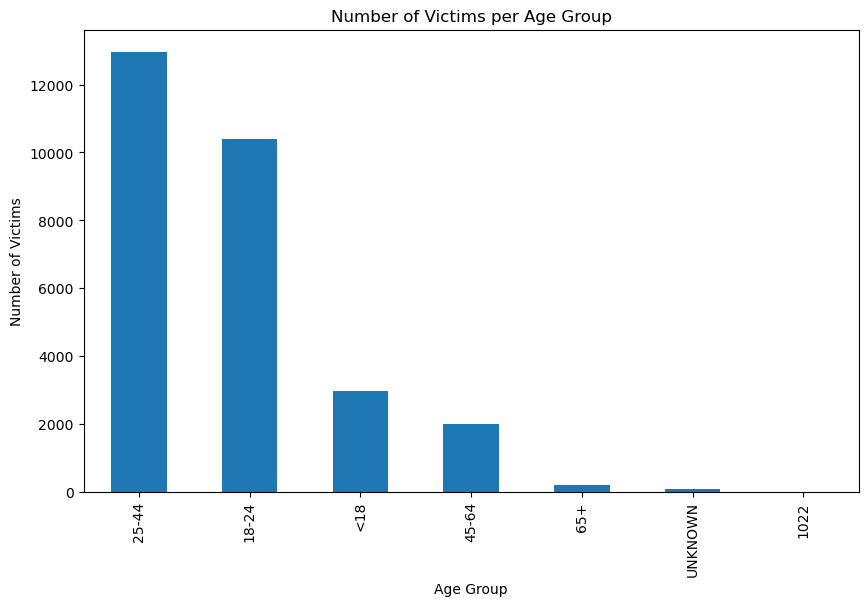

In [37]:
# Count the number of victims for each age group
victim_count_per_age_group = df['VIC_AGE_GROUP'].value_counts()

# Create a bar plot
victim_count_per_age_group.plot(kind='bar', figsize=(10,6))

plt.title('Number of Victims per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Victims')

plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28562 entries, 0 to 28561
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   INCIDENT_KEY             28562 non-null  int64         
 1   OCCUR_DATE               28562 non-null  datetime64[ns]
 2   OCCUR_TIME               28562 non-null  object        
 3   BORO                     28562 non-null  object        
 4   LOC_OF_OCCUR_DESC        2966 non-null   object        
 5   PRECINCT                 28562 non-null  int64         
 6   JURISDICTION_CODE        28560 non-null  float64       
 7   LOC_CLASSFCTN_DESC       2966 non-null   object        
 8   LOCATION_DESC            13585 non-null  object        
 9   STATISTICAL_MURDER_FLAG  28562 non-null  bool          
 10  PERP_AGE_GROUP           19218 non-null  object        
 11  PERP_SEX                 19252 non-null  object        
 12  PERP_RACE                19252 n

In [39]:
%%ai gpt4
Write python code to create a visualization of number of perpetrators per age group in the {df}

To create a visualization of the number of perpetrators per age group, the pandas `value_counts()` function can be used to count the number of perpetrators for each age group. The matplotlib library can then be used to create a bar plot. Note that the column for perpetrator age group is not explicitly given in the data sample you provided. 

However, if we assume that there is a column named `PERP_AGE_GROUP` that contains this information, the code would look like this:

```python
import matplotlib.pyplot as plt

# Count the number of perpetrators for each age group
perpetrator_count_per_age_group = df['PERP_AGE_GROUP'].value_counts()

# Create a bar plot
perpetrator_count_per_age_group.plot(kind='bar', figsize=(10,6))

plt.title('Number of Perpetrators per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Perpetrators')

plt.show()
```

In this code, `df['PERP_AGE_GROUP'].value_counts()` is used to count the number of perpetrators for each age group. The `plot()` function from matplotlib is then used to create a bar plot of the number of perpetrators per age group.

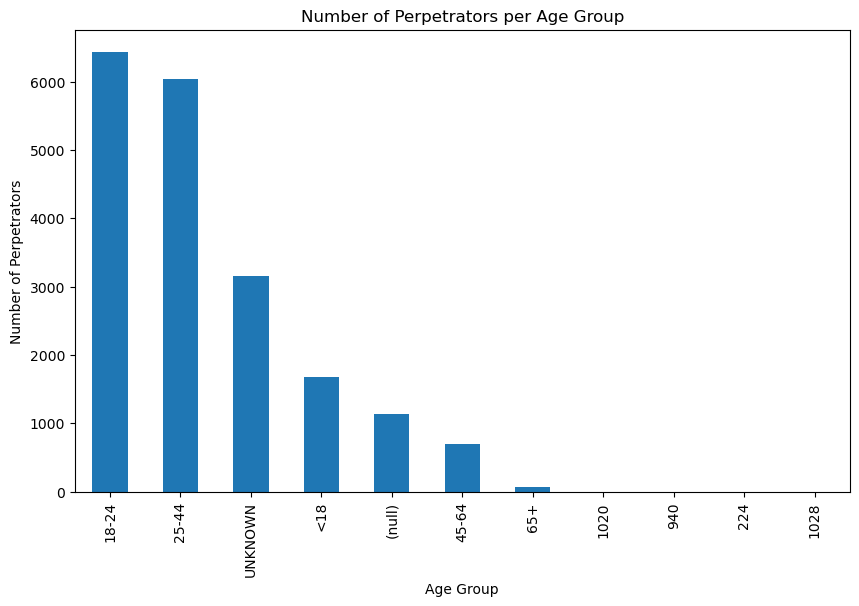

In [40]:
# Count the number of perpetrators for each age group
perpetrator_count_per_age_group = df['PERP_AGE_GROUP'].value_counts()

# Create a bar plot
perpetrator_count_per_age_group.plot(kind='bar', figsize=(10,6))

plt.title('Number of Perpetrators per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Perpetrators')

plt.show()

In [41]:
df.describe()

,INCIDENT_KEY,OCCUR_DATE,PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,year
count,2.856200e+04,28562,28562.000000,28560.000000,2.856200e+04,28562.000000,28503.000000,28503.000000,28562.000000
mean,1.274058e+08,2014-06-07 07:03:45.110286336,65.496009,0.321884,1.009424e+06,208380.075755,40.738570,-73.909099,2013.908585
min,9.953245e+06,2006-01-01 00:00:00,1.000000,0.000000,9.149281e+05,125756.718750,40.511586,-74.249303,2006.000000
25%,6.543991e+07,2009-09-04 06:00:00,44.000000,0.000000,1.000068e+06,182912.000000,40.668648,-73.942917,2009.000000
50%,9.271125e+07,2013-09-20 00:00:00,67.000000,0.000000,1.007772e+06,194901.390625,40.701467,-73.915068,2013.000000
75%,2.031320e+08,2019-09-29 18:00:00,81.000000,0.000000,1.016807e+06,239814.234375,40.824878,-73.882366,2019.000000
max,2.797581e+08,2023-12-29 00:00:00,123.000000,2.000000,1.066815e+06,271127.687500,40.910818,-73.702046,2023.000000
std,7.804340e+07,NaN,27.342643,0.733035,1.830111e+04,31917.509528,0.087611,0.065967,5.392277


In [43]:
df = df.dropna()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2907 entries, 0 to 28561
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   INCIDENT_KEY             2907 non-null   int64         
 1   OCCUR_DATE               2907 non-null   datetime64[ns]
 2   OCCUR_TIME               2907 non-null   object        
 3   BORO                     2907 non-null   object        
 4   LOC_OF_OCCUR_DESC        2907 non-null   object        
 5   PRECINCT                 2907 non-null   int64         
 6   JURISDICTION_CODE        2907 non-null   float64       
 7   LOC_CLASSFCTN_DESC       2907 non-null   object        
 8   LOCATION_DESC            2907 non-null   object        
 9   STATISTICAL_MURDER_FLAG  2907 non-null   bool          
 10  PERP_AGE_GROUP           2907 non-null   object        
 11  PERP_SEX                 2907 non-null   object        
 12  PERP_RACE                2907 non-null

In [48]:
%%ai gpt4
Create a visualization to show the number of incidents per precint in the {df}

To create a visualization of the number of incidents per precinct, you can use the `value_counts()` function in pandas to count the number of incidents for each precinct. Then, you can use the matplotlib library to create a bar plot. 

Here's a sample code:

```python
import matplotlib.pyplot as plt

# Count the number of incidents for each precinct
incident_count_per_precinct = df['PRECINCT'].value_counts()

# Create a bar plot
incident_count_per_precinct.plot(kind='bar', figsize=(10,6))

plt.title('Number of Incidents per Precinct')
plt.xlabel('Precinct')
plt.ylabel('Number of Incidents')

plt.show()
```

In this code, `df['PRECINCT'].value_counts()` is used to count the number of incidents for each precinct. The `plot()` function from matplotlib is then used to create a bar plot of the number of incidents per precinct.

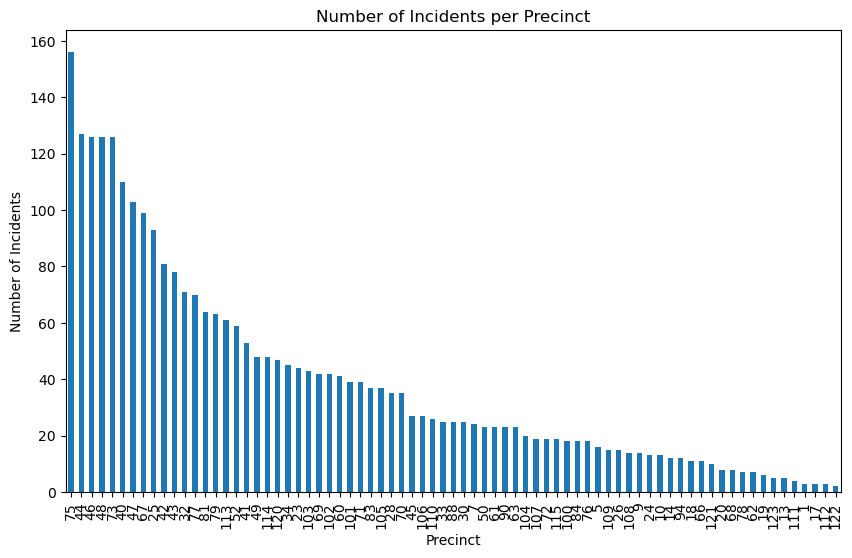

In [49]:
import matplotlib.pyplot as plt

# Count the number of incidents for each precinct
incident_count_per_precinct = df['PRECINCT'].value_counts()

# Create a bar plot
incident_count_per_precinct.plot(kind='bar', figsize=(10,6))

plt.title('Number of Incidents per Precinct')
plt.xlabel('Precinct')
plt.ylabel('Number of Incidents')

plt.show()